## Problem: 
We want to investigate whether there is a significant difference in profits among different categories of products using a supertore dataset containing products information on sells and profits. This analysis can help us identify which category of products is more profitable and provide insights for decision-making related to product assortment, pricing, and marketing strategies.

In [64]:
#Import the pandas library
import pandas as pd

In [ ]:
df= pd.read_csv("superstore_dataset.csv", encoding='latin-1')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,166,CA-2014-139892,09/08/2014,12/09/2014,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,...,78207,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920
1,7647,US-2014-115196,09/09/2014,9/13/2014,Standard Class,DL-12925,Daniel Lacy,Consumer,United States,Greenville,...,27834,South,TEC-MA-10002073,Technology,Machines,"3D Systems Cube Printer, 2nd Generation, White",1299.990,2,0.5,-571.9956
2,1682,CA-2014-122882,09/07/2014,9/13/2014,Standard Class,SB-20290,Sean Braxton,Corporate,United States,Philadelphia,...,19134,East,TEC-MA-10004679,Technology,Machines,StarTech.com 10/100 VDSL2 Ethernet Extender Kit,399.540,4,0.7,-559.3560
3,9481,CA-2014-126193,09/07/2014,9/14/2014,Standard Class,SS-20410,Shahid Shariari,Consumer,United States,Oswego,...,60543,Central,OFF-BI-10004632,Office Supplies,Binders,Ibico Hi-Tech Manual Binding System,304.990,5,0.8,-533.7325
4,7349,CA-2014-130421,03/03/2014,07/03/2014,Standard Class,SC-20020,Sam Craven,Consumer,United States,Houston,...,77095,Central,OFF-AP-10002534,Office Supplies,Appliances,3.6 Cubic Foot Counter Height Office Refrigerator,176.772,3,0.8,-459.6072


## Data cleaning:

Clean the data accordingly. We will be using the profit column that contains numerical data, check if the data contains missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         804 non-null    int64  
 1   Order ID       804 non-null    object 
 2   Order Date     804 non-null    object 
 3   Ship Date      804 non-null    object 
 4   Ship Mode      804 non-null    object 
 5   Customer ID    804 non-null    object 
 6   Customer Name  804 non-null    object 
 7   Segment        804 non-null    object 
 8   Country        804 non-null    object 
 9   City           804 non-null    object 
 10  State          804 non-null    object 
 11  Postal Code    804 non-null    int64  
 12  Region         804 non-null    object 
 13  Product ID     804 non-null    object 
 14  Category       804 non-null    object 
 15  Sub-Category   804 non-null    object 
 16  Product Name   804 non-null    object 
 17  Sales          804 non-null    float64
 18  Quantity  

In [ ]:
df["Profit"].isnull().sum()

0

## Hypothesis testing:

Null Hypothesis (H0): There is no significant difference in the mean profits among the different categories of products.


Alternative Hypothesis (H1): There is a significant difference in the mean profits among the different categories of products.

## Data distribution:

We are going to check the distribution of the the profit column to determine which statistical test to choose

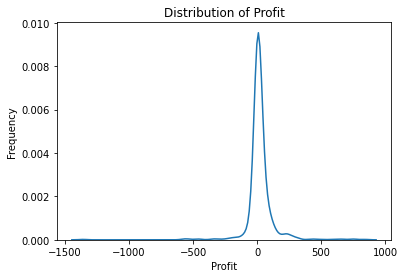

In [ ]:
#import data visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
# Plot a KDE plot
sns.kdeplot(df['Profit'])
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Distribution of Profit')
plt.show()


From the graph above it seems the profit data follows a normal distribution with a bell curve.

<AxesSubplot:>

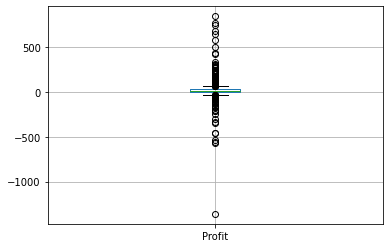

In [ ]:
df.boxplot(column=['Profit'])

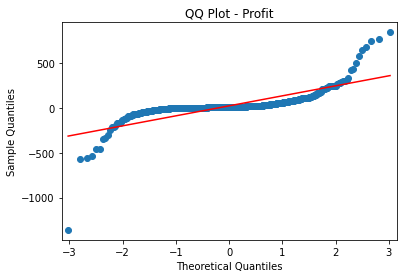

In [ ]:
#Quantile-Quantile plot/ QQ plot

import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# Access the "Profit" column from the DataFrame
data = df["Profit"].values

# Create QQ plot
qqplot(data, line='s')

# Set plot title and labels
plt.title("QQ Plot - Profit")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Display the plot
plt.show()

## Statistical test:

We will examine if there is a significant difference in profits among different categories of products perfoming a ANOVA statitsical test (parametric test) which is used to compare means of at least 3 independant groups. 

In this case, we will use the 'Category' column for the groups and the 'Profit' column as the dependent variable.
We are going to create separate pandas Series for each category.

we would need to create  separate Series for each category:

In [ ]:
df['Category'].nunique()

3

In [ ]:
df["Category"].unique()

array(['Technology', 'Office Supplies', 'Furniture'], dtype=object)

In [ ]:
#filtering the DataFrame to select only the rows where the "Category" column has the value Technology, Furniture, and Office supplies
Technology= df[df['Category'] == 'Technology']['Profit']
Furniture= df[df['Category'] == 'Furniture']['Profit']
Office_Supplies= df[df['Category'] == 'Office Supplies']['Profit']


In [ ]:
#We will be using the stats module from the scipy library
from scipy import stats

In [ ]:
f_stat, p_value = stats.f_oneway(Technology,Furniture,Office_Supplies)
print("fstat:",f_stat,"p-value:", p_value)


fstat: 2.284865392478543 p-value: 0.10245081385652113


 The F stat value compares the variability between the groups. A larger F-value suggests a greater likelihood that the group means are significantly different from each other. It implies stronger evidence against the null hypothesis of equal group means.  The p-value indicates the statistical significance of the F stat value and determines whether the observed differences between the group means are statistically significant or occurred by chance.

Now we will compare our p-value calculated to the significance level alpha 

In [ ]:
alpha= 0.05
if p_value<alpha:
    print("Te null hypothesis is rejected, there is a significant difference in profits among the categories.")
else:
    print("the null hypothesis is not rejected, there is no significant difference in profits among the categories")

Te null hypothesis is rejected, there is a significant difference in profits among the categories.


Optional non-parametric statistical test: 

In [ ]:
import pandas as pd
from scipy.stats import kruskal

# Perform the Kruskal-Wallis test
result = kruskal(df[df['Category'] == 'Technology']['Profit'],
                 df[df['Category'] == 'Furniture']['Profit'],
                 df[df['Category'] == 'Office Supplies']['Profit'])

# Print the test result
print("Kruskal-Wallis Test Result:")
print("Statistic:", result.statistic)
print("p-value:", result.pvalue)


Kruskal-Wallis Test Result:
Statistic: 53.18056295321536
p-value: 2.8313103885781562e-12
